In [174]:
#############################Objectives#################################
#Featrure Selection using SelectKBest using Chi2 method
#Logistic Regression Demo, Classification Metrics
#MinMax Scaling -Feature Scaling Method


#####Challenges#####################

#churn data suffer from imbalanced class classification problem
# to deal with this challenge, smote oversampling method is used here [Synthetic Minority Oversampling Technique]


# ################Min-Max Scaling####################
#As data columns are not in single measurement units like Age is in Years,Gender and Geography is categorical,
#Balnce and Estimated Sal is in Rupees and many more, therfore the analysis results will not accurate
#Min-Max Normalization(0-1): =(Vi-Mini/Maxi-Mini)(0-1)
#Let Vi=73600
Min=12000
#Max=78000
#New Vi after computation=0.716
#used where gradient descent matter like Logistic Regression,Linear Regression,Neural Network 

# #################Standardization##########################
#for k-nearest neibhour, KNN Classifier
#Let V=73600
#mew=54000
#sd=16000
#z-score=(v-mew)/sd ==>1.225
#zero mean and sd=1
#data is distributed around mean


In [175]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
churn_data=pd.read_csv("Downloads/Churn_Modelling.csv")

In [178]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [179]:
churn_data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [180]:
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [181]:
churn_data['Gender']=churn_data['Gender'].map({'Male':1,'Female':0})

In [182]:
churn_data['Geography']=churn_data['Geography'].map({'France':0,'Germany':1,'Spain':2})

In [183]:
X=churn_data.drop(columns=['Exited'],axis=1)

In [184]:
y=churn_data['Exited']

In [185]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [186]:
X.drop(columns=['HasCrCard'],axis=1,inplace=True)#previous tutorial have indicated that hascreditcard column 
                                                 #has no significant effect on Exited column, therefore drop the column

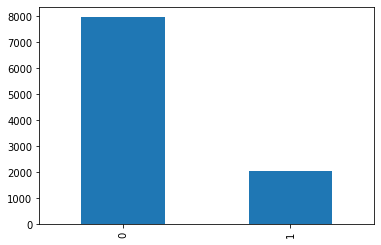

In [187]:
y.value_counts().plot(kind="bar")#Since Target class has imbalance classification therefore accuracy will be biased towards
                                # majority

In [188]:
cols=X.columns.tolist()

In [189]:
scaling=MinMaxScaler()

In [190]:
X=scaling.fit_transform(X)

In [191]:
X=pd.DataFrame(columns=cols,data=X)

In [192]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,0.395400


In [193]:
#without K-Selector

In [194]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [195]:
x_train.shape,x_test.shape

((8000, 9), (2000, 9))

In [196]:
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 

In [197]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 6346
After OverSampling, counts of label '0': 6346


In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
model=LogisticRegression(random_state=2,solver='lbfgs')

In [200]:
model.fit(x_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred=model.predict(x_test)

In [202]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,\
                            roc_curve,precision_score,f1_score,recall_score

In [203]:
log_roc_auc=roc_auc_score(y_test,y_pred)

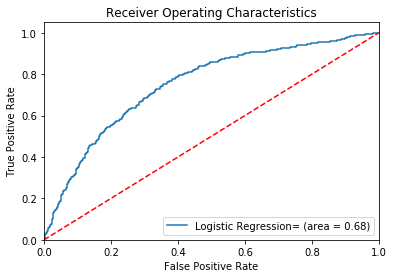

In [204]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression= (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

In [205]:
results=pd.DataFrame([["Logistic Regression", accuracy_score(y_test,y_pred)*100,\
               precision_score(y_test,y_pred),recall_score(y_test,y_pred),\
               f1_score(y_test,y_pred),cohen_kappa_score(y_test,y_pred)]],columns=['Model', 'Accuracy', 'Precision',\
                                                  'Recall','F1 Score','kappa Score'])

In [206]:
confusion_matrix(y_test,y_pred)

array([[1158,  459],
       [ 133,  250]], dtype=int64)

In [207]:
results

,Model,Accuracy,Precision,Recall,F1 Score,kappa Score
0,Logistic Regression,70.4,0.352609,0.652742,0.457875,0.278447


In [152]:
#with K Selector

In [208]:
sel_feature=SelectKBest(chi2,k=8).fit(X,y)

In [209]:
sel_bool=sel_feature.get_support()

In [210]:
X_Sel=X[X.columns[sel_bool]]

In [211]:
X_Sel.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,1.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0


In [212]:
x_train,x_test,y_train,y_test=train_test_split(X_Sel,y,test_size=0.2,random_state=2)


In [213]:
x_train.shape,x_test.shape

((8000, 8), (2000, 8))

In [214]:
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 



In [215]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (12692, 8)
After OverSampling, the shape of train_y: (12692,) 



In [216]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 6346
After OverSampling, counts of label '0': 6346


In [217]:

x_test=x_test[X.columns[sel_bool]]

In [218]:
#Logistic Regression

In [219]:
model=LogisticRegression(random_state=2,solver='lbfgs')

In [220]:
model.fit(x_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
y_pred=model.predict(x_test)

In [222]:
log_roc_auc=roc_auc_score(y_test,y_pred)

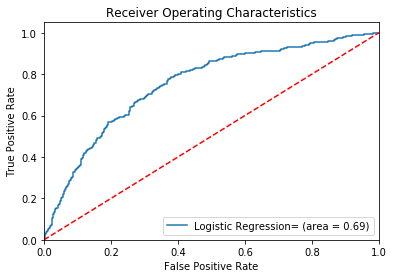

In [223]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression= (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

In [224]:
results=results.append(pd.DataFrame([["Logistic Regression with K Selector", accuracy_score(y_test,y_pred)*100,\
               precision_score(y_test,y_pred),recall_score(y_test,y_pred),\
               f1_score(y_test,y_pred),cohen_kappa_score(y_test,y_pred)]],columns=['Model', 'Accuracy', 'Precision',\
                                                  'Recall','F1 Score','kappa Score']),ignore_index=True)

In [225]:
confusion_matrix(y_test,y_pred)#with k-selector

array([[1164,  453],
       [ 127,  256]], dtype=int64)

In [226]:
results

,Model,Accuracy,Precision,Recall,F1 Score,kappa Score
0,Logistic Regression,70.4,0.352609,0.652742,0.457875,0.278447
1,Logistic Regression with K Selector,71.0,0.361072,0.668407,0.468864,0.293073
